In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
media=pd.read_csv('C:/Users/Bharat Sakarwal/Downloads/UpGrad/mediacompany.csv')

In [4]:
media_dict=pd.read_csv('C:/Users/Bharat Sakarwal/Downloads/UpGrad/DataDictionary_mediacompany.csv')

In [11]:
pd.set_option('display.max_colwidth',None)
media_dict

,Variable,Explaination
0,Views_show,Number of times the show was viewed
1,Visitors,"Number of visitors who browsed the platform, but not necessarily watched a video."
2,Views_platform,Number of times a video was viewed on the platform
3,Ad_impression,Proxy for marketing budget. Represents number of impressions generated by ads
4,Cricket_match_india,"If a cricket match was being played. 1 indicates that there was a match on a given day, 0 indicates there wasn't"
5,Character_A,"Describes presence of Character A. 1 indicates that character A was present in the episode, 0 indicates she/he wasn't"


In [5]:
media['Ad_impression']=media['Ad_impression']/6

In [6]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1.768101e+08,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1.719744e+08,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1.684779e+08,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1.798658e+08,1,0,NaN
4,3/5/2017,446314,1594712,2041418,2.262895e+08,0,0,NaN


array([[<AxesSubplot:title={'center':'Views_show'}>,
        <AxesSubplot:title={'center':'Visitors'}>],
       [<AxesSubplot:title={'center':'Views_platform'}>,
        <AxesSubplot:title={'center':'Ad_impression'}>],
       [<AxesSubplot:title={'center':'Cricket_match_india'}>,
        <AxesSubplot:title={'center':'Character_A'}>]], dtype=object)

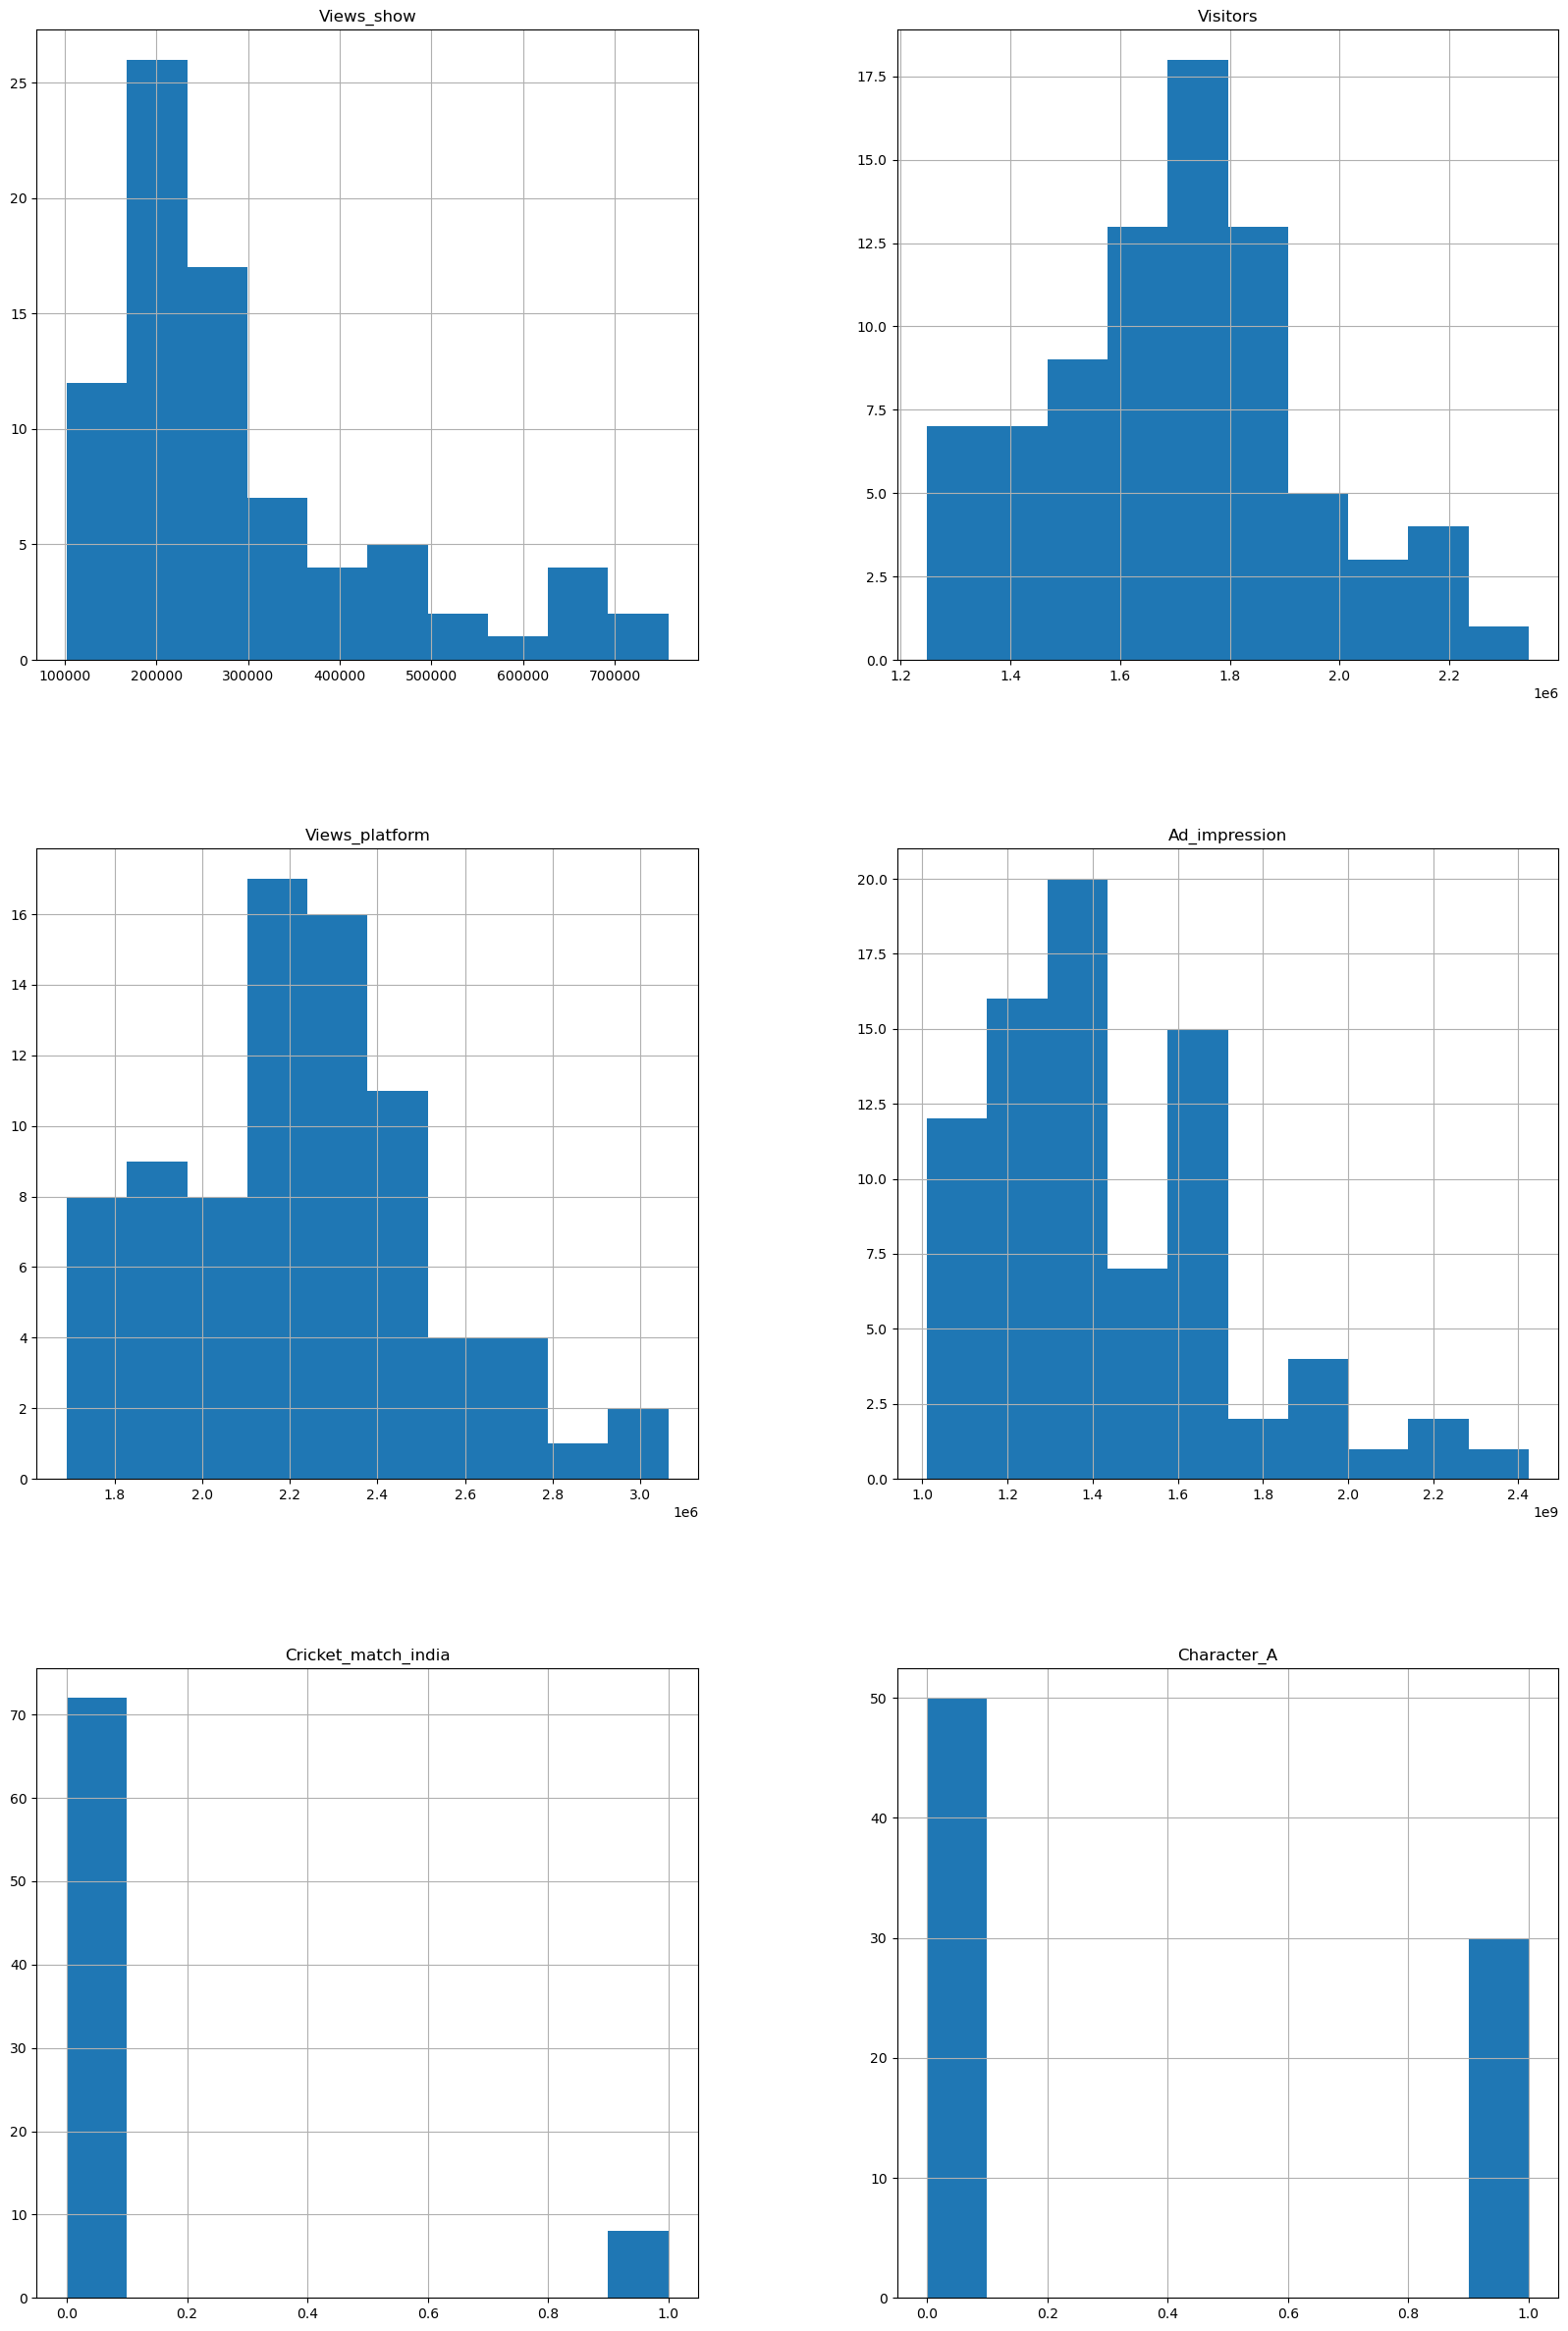

In [18]:
media.hist(figsize=(20,30))

In [7]:
media=media.drop(['Unnamed: 7'],axis=1)

<AxesSubplot:xlabel='Character_A', ylabel='Views_show'>

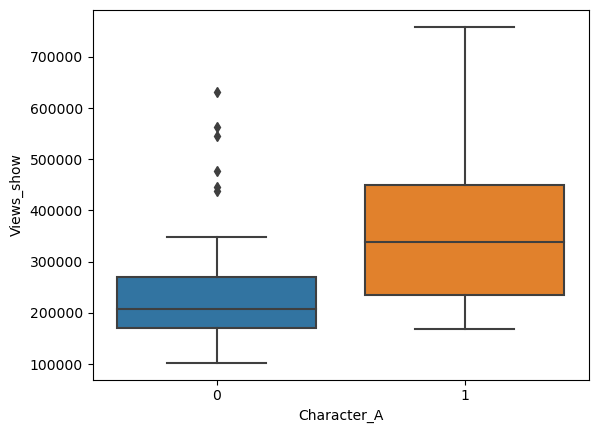

In [12]:
sns.boxplot(x='Character_A',y='Views_show',data=media)

<AxesSubplot:xlabel='Cricket_match_india', ylabel='Views_show'>

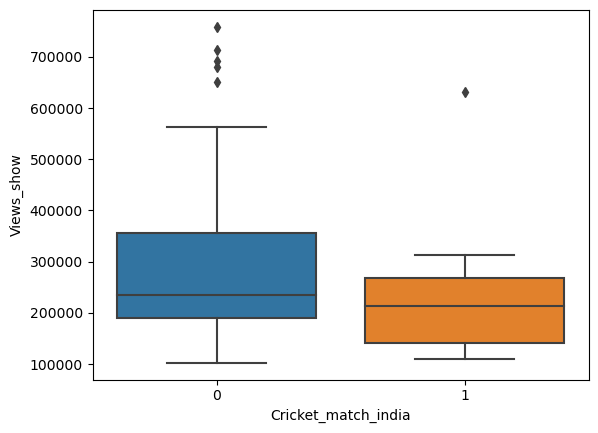

In [14]:
sns.boxplot(x='Cricket_match_india',y='Views_show',data=media) #this show is not about cricket

<AxesSubplot:xlabel='Cricket_match_india', ylabel='Visitors'>

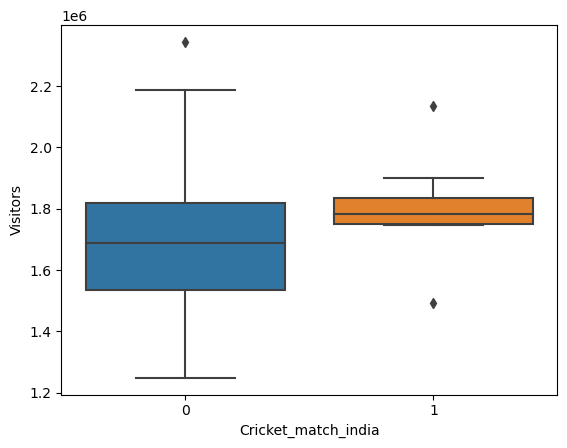

In [15]:
sns.boxplot(x='Cricket_match_india',y='Visitors',data=media) 

<AxesSubplot:xlabel='Cricket_match_india', ylabel='Views_show'>

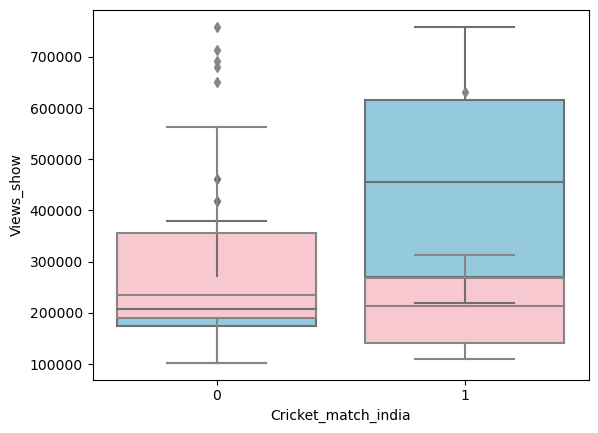

In [38]:
sns.boxplot(x='Weekend',y='Views_show',data=media,color="skyblue")
sns.boxplot(x='Cricket_match_india',y='Views_show',data=media,color='pink')

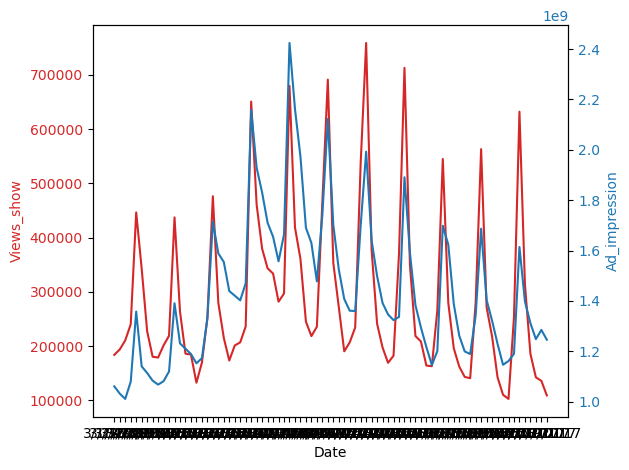

In [75]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Views_show', color=color)
ax1.plot(media['Date'], media['Views_show'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Ad_impression', color=color)
ax2.plot(media['Date'], media['Ad_impression'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [8]:
media['day']=pd.to_datetime(media['Date']).dt.day

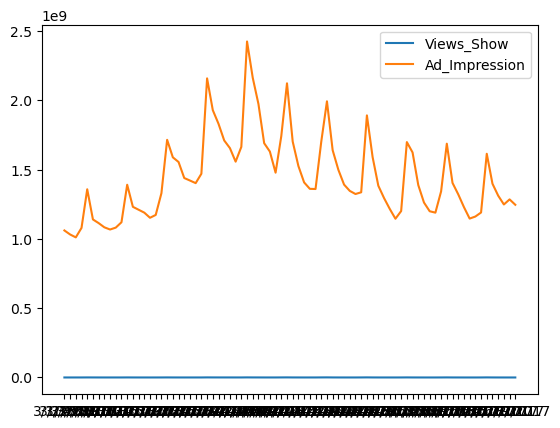

In [76]:
#media.plot(kind='line',x='Date',y='Views_show')
#media.plot(kind='line',x='Date',y='Ad_impression')

plt.plot(media['Date'],media['Views_show'],label='Views_Show')
plt.plot(media['Date'],media['Ad_impression'],label='Ad_Impression')
plt.legend()
plt.show()

In [9]:
media.head(2)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,3/1/2017,183738,1260228,1706478,1.768101e+08,0,0,1
1,3/2/2017,193763,1270561,1690727,1.719744e+08,0,0,2


In [10]:
def date_time(D):
    day=pd.to_datetime(D)
    if day.weekday() in [5,6]:
        return 1
    else:
        return 0

In [39]:
date_time('5/7/2023')

1

In [40]:
media.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'Weekend'],
      dtype='object')

In [11]:
media['Weekend']=media['Date'].apply(date_time)

In [16]:
y=media['Views_show']
x=media[['Visitors','Views_platform','Cricket_match_india', 'Character_A', 'Weekend','Ad_impression']]

In [50]:
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Views_show   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              223.4
Date:                Wed, 10 May 2023   Prob (F-statistic):                    2.60e-45
Time:                        15:33:46   Log-Likelihood:                         -1011.6
No. Observations:                  80   AIC:                                      2035.
Df Residuals:                      74   BIC:                                      2050.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Visitors               -0.2330      0.144     -1.615      0.111      -0.521       0.054
Views_platform          0.0997      0.113      0.881      0.381      -0.126       0.325
Cricket_match_india -3883.8549   3.12e+04     -0.124      0.901   -6.61e+04    5.83e+04
Character_A         -1.439e+04   2.67e+04     -0.538      0.592   -6.76e+04    3.89e+04
Weekend              1.886e+05    2.1e+04      9.001      0.000    1.47e+05     2.3e+05
Ad_impression           0.0003   4.16e-05      7.043      0.000       0.000       0.000
==============================================================================
Omnibus:                        8.165   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                9.749
Skew:                           0.478   Prob(JB):                      0.00764
Kurtosis:                       4.418   Cond. No.                     5.30e+09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.3e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
y=media['Views_show']
#x=media[['Cricket_match_india','Character_A', 'Weekend','Ad_impression']] --itr 1
x=media[['Weekend','Ad_impression']] #--itr 2
#x=media[['Character_A','Ad_impression']]
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Views_show   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              574.2
Date:                Wed, 10 May 2023   Prob (F-statistic):                    2.17e-47
Time:                        19:37:09   Log-Likelihood:                         -1019.4
No. Observations:                  80   AIC:                                      2043.
Df Residuals:                      78   BIC:                                      2048.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Weekend        1.773e+05   2.18e+04      8.147      0.000    1.34e+05    2.21e+05
Ad_impression     0.0010   4.65e-05     22.377      0.000       0.001       0.001
==============================================================================
Omnibus:                        4.565   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                3.763
Skew:                           0.458   Prob(JB):                        0.152
Kurtosis:                       3.538   Cond. No.                     5.70e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
media_pred=media

In [14]:
media_pred['yhat']=model.predict(x)
media_pred.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,Weekend,yhat
0,3/1/2017,183738,1260228,1706478,1.768101e+08,0,0,1,0,183937.518386
1,3/2/2017,193763,1270561,1690727,1.719744e+08,0,0,2,0,178906.953874
2,3/3/2017,210479,1248183,1726157,1.684779e+08,0,0,3,0,175269.493281
3,3/4/2017,240061,1492913,1855353,1.798658e+08,1,0,4,1,364382.671204
4,3/5/2017,446314,1594712,2041418,2.262895e+08,0,0,5,1,412677.806902


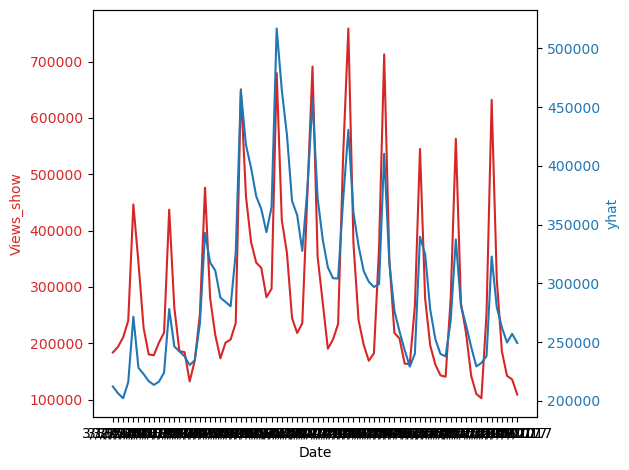

In [110]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Views_show', color=color)
ax1.plot(media['Date'], media['Views_show'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('yhat', color=color)
ax2.plot(media['Date'], media['yhat'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

<AxesSubplot:>

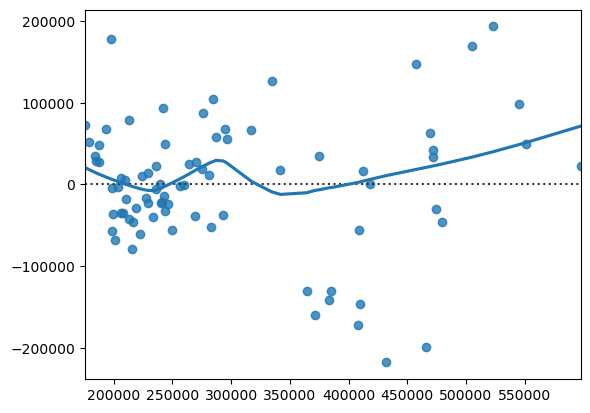

In [106]:
residual=model.resid
sns.residplot(x=model.fittedvalues,y=residual,lowess=True)  # no significance distribution in error in residuals

In [99]:
vif=[variance_inflation_factor(x,i) for i in range(0,x.shape[1])]
vif
c=x.columns
vif_df={}
for i in range(0,x.shape[1]):
    vif_df[c[i]]=vif[i]
vif_df

{'Weekend': 1.481734521968761, 'Ad_impression': 1.481734521968761}